In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("sixth(1000).csv")
df

,Person ID,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Blood Pressure 1,Blood Pressure 2,Heart Rate,Daily Steps,BMI Levels,Occupation,Gender
0,1,10,8.0,41,1,8,126,82,95,7000,2,Software Engineer,Female
1,2,8,7.0,44,1,6,138,74,66,9000,2,Accountant,Female
2,3,8,7.0,31,3,5,123,68,76,4000,3,Salesperson,Female
3,4,10,8.0,36,2,6,131,76,74,6000,2,Sales Representative,Female
4,5,10,8.0,37,3,3,103,67,89,7000,2,Lawyer,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,7.0,36,5,4,119,69,87,7000,2,Engineer,Female
996,997,7,6.5,49,2,9,127,83,78,6000,1,Engineer,Male
997,998,7,6.5,37,3,5,129,76,65,8000,2,Sales Representative,Female
998,999,5,5.5,24,2,8,122,83,65,7000,1,Nurse,Female


In [50]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Blood Pressure 1'}>,
        <Axes: title={'center': 'Blood Pressure 2'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>,
        <Axes: title={'center': 'BMI Levels'}>, <Axes: >]], dtype=object)

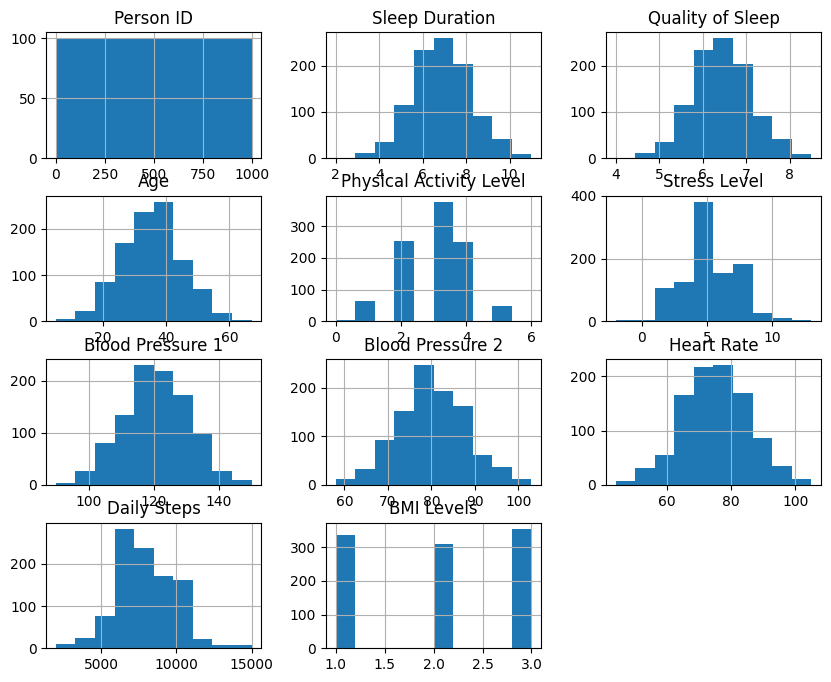

In [51]:
df.hist(figsize=(10, 8))

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isnull().sum()

Person ID                  0
Sleep Duration             0
Quality of Sleep           0
Age                        0
Physical Activity Level    0
Stress Level               0
Blood Pressure 1           0
Blood Pressure 2           0
Heart Rate                 0
Daily Steps                0
BMI Levels                 0
Occupation                 0
Gender                     0
dtype: int64

In [54]:
df['Blood Pressure'] = df['Blood Pressure 1'].astype(str) + '/' + df['Blood Pressure 2'].astype(str)

In [55]:
df = df.drop(columns=["Blood Pressure 1", "Blood Pressure 2"])


In [56]:
df

,Person ID,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Levels,Occupation,Gender,Blood Pressure
0,1,10,8.0,41,1,8,95,7000,2,Software Engineer,Female,126/82
1,2,8,7.0,44,1,6,66,9000,2,Accountant,Female,138/74
2,3,8,7.0,31,3,5,76,4000,3,Salesperson,Female,123/68
3,4,10,8.0,36,2,6,74,6000,2,Sales Representative,Female,131/76
4,5,10,8.0,37,3,3,89,7000,2,Lawyer,Female,103/67
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,7.0,36,5,4,87,7000,2,Engineer,Female,119/69
996,997,7,6.5,49,2,9,78,6000,1,Engineer,Male,127/83
997,998,7,6.5,37,3,5,65,8000,2,Sales Representative,Female,129/76
998,999,5,5.5,24,2,8,65,7000,1,Nurse,Female,122/83


In [57]:
# Convert "Blood Pressure Ratio" from string (e.g., "126/82") to numeric
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(df[['Blood Pressure']].head())

   Blood Pressure
0        1.536585
1        1.864865
2        1.808824
3        1.723684
4        1.537313


In [58]:
from sklearn import preprocessing

# Create 'BMI Category' based on 'BMI Levels'
# df['BMI Category'] = pd.cut(df['BMI Levels'], bins=[0, 1, 2, 3, 4], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    
df.rename(columns={"BMI Levels": "BMI Category"}, inplace=True)
categorical = ["Gender",  "BMI Category"]

label_encoder = preprocessing.LabelEncoder()

# Now apply label encoding
for label in categorical:
    df[label] = label_encoder.fit_transform(df[label])

df.head()

,Person ID,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Occupation,Gender,Blood Pressure
0,1,10,8.0,41,1,8,95,7000,1,Software Engineer,0,1.536585
1,2,8,7.0,44,1,6,66,9000,1,Accountant,0,1.864865
2,3,8,7.0,31,3,5,76,4000,2,Salesperson,0,1.808824
3,4,10,8.0,36,2,6,74,6000,1,Sales Representative,0,1.723684
4,5,10,8.0,37,3,3,89,7000,1,Lawyer,0,1.537313


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1000 non-null   int64  
 1   Sleep Duration           1000 non-null   int64  
 2   Quality of Sleep         1000 non-null   float64
 3   Age                      1000 non-null   int64  
 4   Physical Activity Level  1000 non-null   int64  
 5   Stress Level             1000 non-null   int64  
 6   Heart Rate               1000 non-null   int64  
 7   Daily Steps              1000 non-null   int64  
 8   BMI Category             1000 non-null   int64  
 9   Occupation               1000 non-null   object 
 10  Gender                   1000 non-null   int64  
 11  Blood Pressure           1000 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 93.9+ KB


In [60]:
df['Physical Activity Level'].describe()

count    1000.000000
mean        2.953000
std         1.002894
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical Activity Level, dtype: float64

In [61]:
## Normalization of Sleep Duration & Quality of Sleep & Physical Activity Level & Stress Level & Blood Pressure & Heart Rate
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[['Physical Activity Level']] = scaler.fit_transform(df[['Physical Activity Level']])
df[['Physical Activity Level']].describe()


,Physical Activity Level
count,1000.000000
mean,0.492167
std,0.167149
min,0.000000
25%,0.333333
50%,0.500000
75%,0.666667
max,1.000000


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
first = pd.read_csv('first_clean.csv')
second = pd.read_csv('second_clean.csv')
third = pd.read_csv('third_clean.csv')
sixth = pd.read_csv('sixth_clean.csv')

In [64]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    int64  
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    float64
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    int64  
 9   Blood Pressure           373 non-null    float64
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 35.1+ KB


In [65]:
second.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    int64  
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    float64
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    int64  
 9   Blood Pressure           186 non-null    float64
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.6+ KB


In [66]:
third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                400 non-null    int64  
 1   Gender                   400 non-null    int64  
 2   Age                      400 non-null    int64  
 3   Occupation               400 non-null    object 
 4   Sleep Duration           400 non-null    float64
 5   Quality of Sleep         400 non-null    float64
 6   Physical Activity Level  400 non-null    float64
 7   Stress Level             400 non-null    int64  
 8   BMI Category             400 non-null    int64  
 9   Blood Pressure           400 non-null    float64
 10  Heart Rate               400 non-null    int64  
 11  Daily Steps              400 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 37.6+ KB


In [67]:
sixth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1000 non-null   int64  
 1   Sleep Duration           1000 non-null   float64
 2   Quality of Sleep         1000 non-null   float64
 3   Age                      1000 non-null   int64  
 4   Physical Activity Level  1000 non-null   float64
 5   Stress Level             1000 non-null   float64
 6   Heart Rate               1000 non-null   float64
 7   Daily Steps              1000 non-null   int64  
 8   BMI Category             1000 non-null   int64  
 9   Occupation               1000 non-null   object 
 10  Gender                   1000 non-null   int64  
 11  Blood Pressure           1000 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 93.9+ KB


In [68]:
# Merge by stacking (adding rows)
Sleep_quality= pd.concat([first, second, third , sixth], ignore_index=True)

In [69]:
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.100000,6.000000,0.200000,6.000000,3,1.518072,77.000000,4200
1,2,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
2,3,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
3,4,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
4,5,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,0.666667,0.666667,0.833333,0.400000,1,0.568698,0.704918,7000
1955,997,1,49,Engineer,0.555556,0.555556,0.333333,0.733333,0,0.409007,0.557377,6000
1956,998,0,37,Sales Representative,0.555556,0.555556,0.500000,0.466667,1,0.546311,0.344262,8000
1957,999,0,24,Nurse,0.333333,0.333333,0.333333,0.666667,0,0.359552,0.344262,7000


In [70]:
Sleep_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1959 non-null   int64  
 1   Gender                   1959 non-null   int64  
 2   Age                      1959 non-null   int64  
 3   Occupation               1959 non-null   object 
 4   Sleep Duration           1959 non-null   float64
 5   Quality of Sleep         1959 non-null   float64
 6   Physical Activity Level  1959 non-null   float64
 7   Stress Level             1959 non-null   float64
 8   BMI Category             1959 non-null   int64  
 9   Blood Pressure           1959 non-null   float64
 10  Heart Rate               1959 non-null   float64
 11  Daily Steps              1959 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 183.8+ KB


In [71]:
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.100000,6.000000,0.200000,6.000000,3,1.518072,77.000000,4200
1,2,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
2,3,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
3,4,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
4,5,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,0.666667,0.666667,0.833333,0.400000,1,0.568698,0.704918,7000
1955,997,1,49,Engineer,0.555556,0.555556,0.333333,0.733333,0,0.409007,0.557377,6000
1956,998,0,37,Sales Representative,0.555556,0.555556,0.500000,0.466667,1,0.546311,0.344262,8000
1957,999,0,24,Nurse,0.333333,0.333333,0.333333,0.666667,0,0.359552,0.344262,7000


In [72]:
Sleep_quality.duplicated().sum()

np.int64(0)

In [73]:
Sleep_quality.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

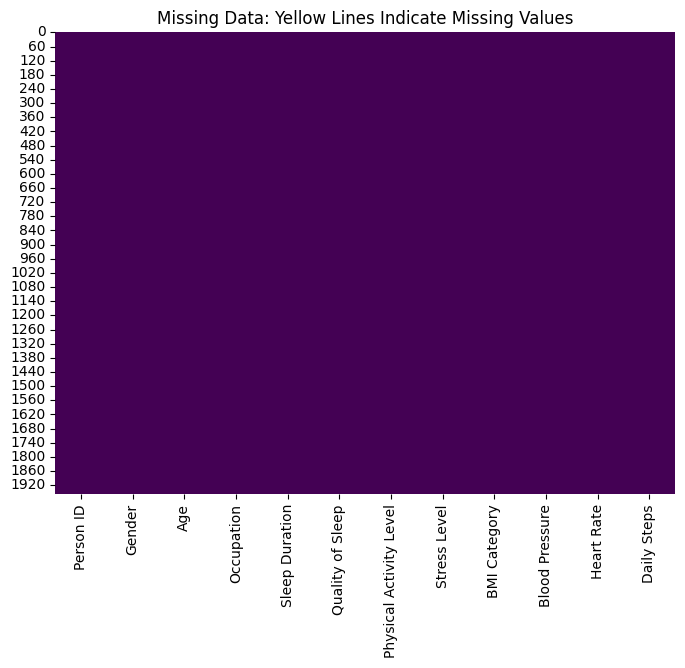

In [74]:
# Explore missing data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Sleep_quality.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data: Yellow Lines Indicate Missing Values')
plt.show()

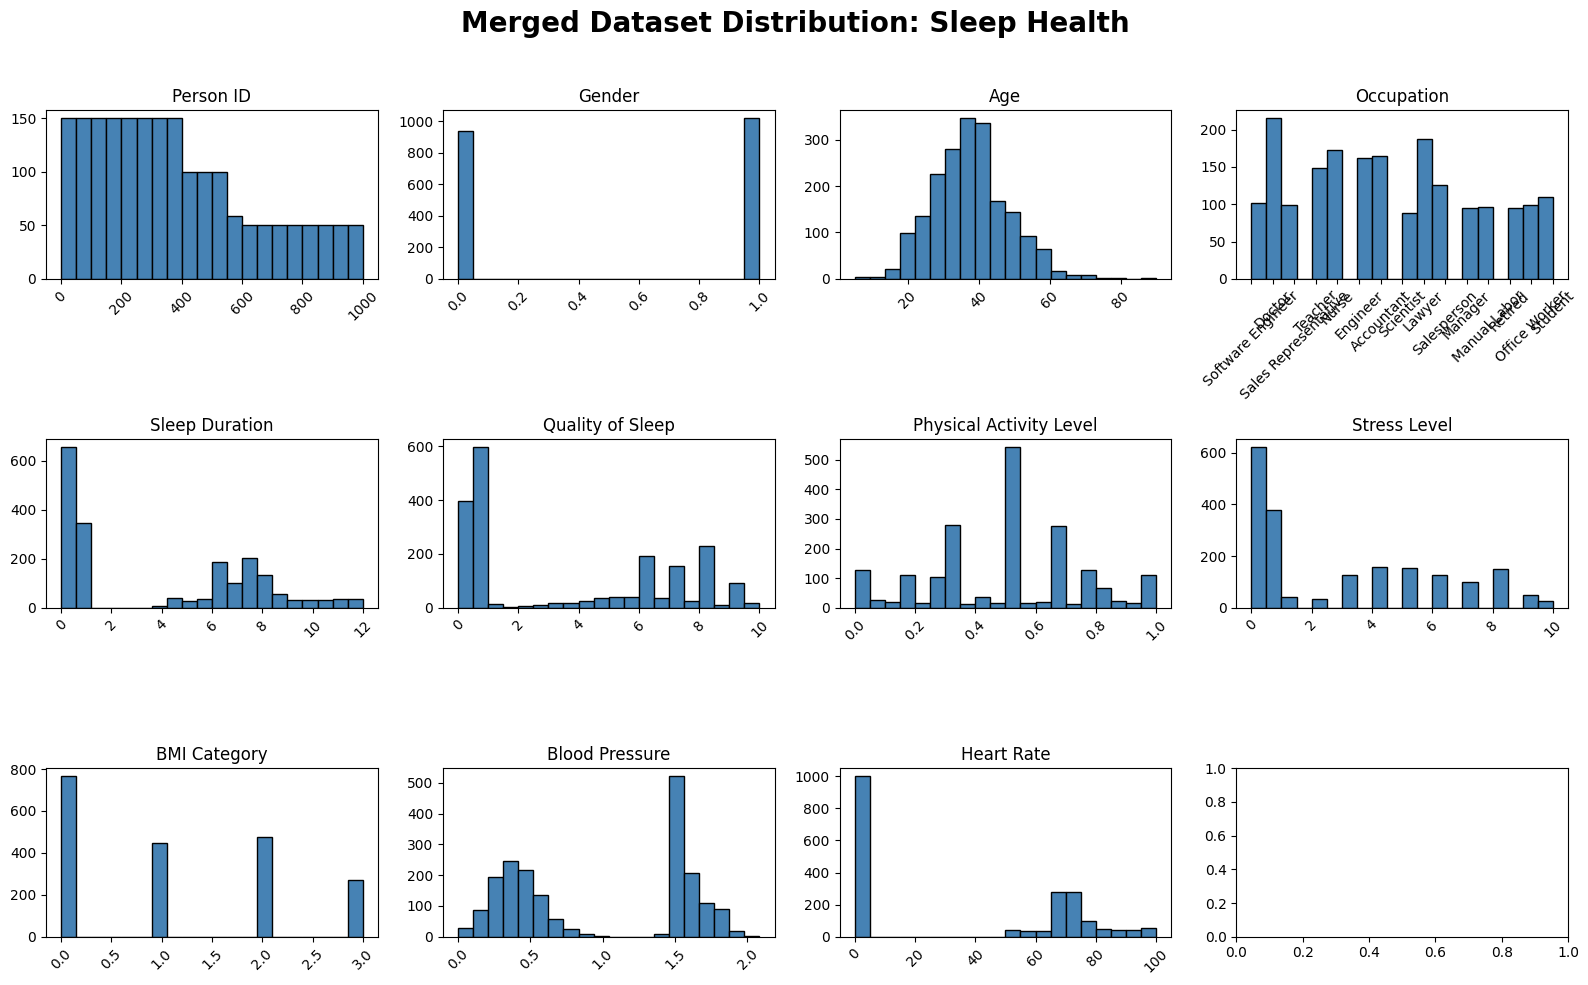

In [75]:
# Plot histograms for all columns in the merged dataset
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
ax = ax.flatten()

for i, feature in enumerate(Sleep_quality.columns[:11]):  # limit to first 11 features to fit layout
    ax[i].hist(Sleep_quality[feature], bins=20, color='steelblue', edgecolor='black')
    ax[i].set_title(feature)
    ax[i].tick_params(axis='x', rotation=45)

# General figure title
fig.suptitle("Merged Dataset Distribution: Sleep Health", fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [76]:
Sleep_quality.to_csv('merge.csv', index=False)
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.100000,6.000000,0.200000,6.000000,3,1.518072,77.000000,4200
1,2,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
2,3,1,28,Doctor,6.200000,6.000000,0.500000,8.000000,0,1.562500,75.000000,10000
3,4,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
4,5,1,28,Sales Representative,5.900000,4.000000,0.000000,8.000000,2,1.555556,85.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,0.666667,0.666667,0.833333,0.400000,1,0.568698,0.704918,7000
1955,997,1,49,Engineer,0.555556,0.555556,0.333333,0.733333,0,0.409007,0.557377,6000
1956,998,0,37,Sales Representative,0.555556,0.555556,0.500000,0.466667,1,0.546311,0.344262,8000
1957,999,0,24,Nurse,0.333333,0.333333,0.333333,0.666667,0,0.359552,0.344262,7000


In [77]:


# Assuming 'df' is your dfFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }
    
    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

# Display results
for col, info in outliers.items():
    print(f"\n📊 Outlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")



📊 Outlier Analysis for: Person ID
Q1: 250.75, Q3: 750.25, IQR: 499.5
Lower Bound: -498.5, Upper Bound: 1499.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Sleep Duration
Q1: 6.0, Q3: 8.0, IQR: 2.0
Lower Bound: 3.0, Upper Bound: 11.0
Number of Outliers: 1
Outliers: [2]


📊 Outlier Analysis for: Quality of Sleep
Q1: 6.0, Q3: 7.0, IQR: 1.0
Lower Bound: 4.5, Upper Bound: 8.5
Number of Outliers: 1
Outliers: [4.]


📊 Outlier Analysis for: Age
Q1: 28.0, Q3: 41.0, IQR: 13.0
Lower Bound: 8.5, Upper Bound: 60.5
Number of Outliers: 7
Outliers: [67  7 61  7  5 62 61]


📊 Outlier Analysis for: Physical Activity Level
Q1: 0.3333333333333333, Q3: 0.6666666666666666, IQR: 0.3333333333333333
Lower Bound: -0.16666666666666669, Upper Bound: 1.1666666666666665
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Stress Level
Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0
Number of Outliers: 23
Outliers: [-1 10 12 13 10 11  0 11  0 12  0 -1 10  0 10 10 -2 10 10 -2 10

In [78]:
df.to_csv('sixth_clean.csv', index=False)
df

,Person ID,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Occupation,Gender,Blood Pressure
0,1,10,8.0,41,0.166667,8,95,7000,1,Software Engineer,0,1.536585
1,2,8,7.0,44,0.166667,6,66,9000,1,Accountant,0,1.864865
2,3,8,7.0,31,0.500000,5,76,4000,2,Salesperson,0,1.808824
3,4,10,8.0,36,0.333333,6,74,6000,1,Sales Representative,0,1.723684
4,5,10,8.0,37,0.500000,3,89,7000,1,Lawyer,0,1.537313
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,7.0,36,0.833333,4,87,7000,1,Engineer,0,1.724638
996,997,7,6.5,49,0.333333,9,78,6000,0,Engineer,1,1.530120
997,998,7,6.5,37,0.500000,5,65,8000,1,Sales Representative,0,1.697368
998,999,5,5.5,24,0.333333,8,65,7000,0,Nurse,0,1.469880
